# Simple Linear Regression from Scratch

This notebook implements Linear Regression algorithm from scratch using only NumPy and Pandas. 

**What we'll do:**
1. Load and explore the medical insurance dataset
2. Simple data preprocessing 
3. Implement linear regression from scratch
4. Evaluate the model performance

**Dataset**: Medical Insurance Price Prediction Dataset

In [24]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear Regression Implementation

Linear Regression finds the best line that fits our data by minimizing prediction errors.

**Formula**: θ = (X^T X)^(-1) X^T y
- θ = parameters we want to learn
- X = our features with a column of 1s added
- y = target values (insurance charges)

In [27]:
def linear_regression(x_train, y_train):
    """
    Simple Linear Regression implementation
    
    Args:
        x_train: Training features 
        y_train: Training targets
    
    Returns:
        theta: Learned parameters
        metrics: Training performance metrics
    """
    # Add column of 1s for the intercept (bias term)
    X = np.column_stack([np.ones(len(x_train)), x_train])
    
    # Calculate parameters using normal equation: θ = (X^T X)^(-1) X^T y
    theta = np.linalg.inv(X.T @ X) @ X.T @ y_train
    
    # Make predictions to calculate performance
    predictions = X @ theta
    
    # Calculate metrics
    mse = np.mean((y_train - predictions) ** 2)
    rmse = np.sqrt(mse)
    
    # R-squared (how much of the data variation our model explains)
    ss_res = np.sum((y_train - predictions) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y_train - np.mean(y_train)) ** 2)  # Total sum of squares
    r2_score = 1 - (ss_res / ss_tot)
    
    metrics = {
        'mse': mse,
        'rmse': rmse,
        'r2_score': r2_score
    }
    
    return theta, metrics

def predict(X, theta):
    """Make predictions using learned parameters"""
    X_with_bias = np.column_stack([np.ones(len(X)), X])
    return X_with_bias @ theta

## Load and Explore Data

Let's load the medical insurance dataset and see what we're working with.

In [30]:
# Load the dataset
df = pd.read_csv('/Users/harshilvadalia/Desktop/tp/tp2/Medical Price Dataset.csv')

print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nBasic statistics:")
print(df.describe())

Dataset Info:
Shape: (1338, 7)

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

First few rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Basic statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
ma

## Simple Data Preprocessing

We need to convert text data to numbers so our algorithm can work with it.

**Steps:**
1. Convert categorical variables to numbers
2. Split data into training and testing sets
3. Scale features to similar ranges

In [33]:
# Check for missing values
print("Missing values:", df.isnull().sum().sum())

# Convert categorical variables to numbers
df_processed = df.copy()

# Convert sex: male=1, female=0
df_processed['sex'] = df_processed['sex'].map({'male': 1, 'female': 0})

# Convert smoker: yes=1, no=0  
df_processed['smoker'] = df_processed['smoker'].map({'yes': 1, 'no': 0})

# Convert region to numbers (simple approach)
region_map = {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
df_processed['region'] = df_processed['region'].map(region_map)

print("After preprocessing:")
print(df_processed.head())

# Select features and target
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
X = df_processed[features].values
y = df_processed['charges'].values

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

Missing values: 0
After preprocessing:
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

Features shape: (1338, 6)
Target shape: (1338,)


## Train-Test Split and Feature Scaling

Split data into training and testing sets, then scale features to improve performance.

In [36]:
# Simple train-test split (80% train, 20% test)
np.random.seed(42)  # For reproducible results
n_samples = len(X)
n_train = int(0.8 * n_samples)

# Shuffle indices
indices = np.random.permutation(n_samples)
train_idx = indices[:n_train]
test_idx = indices[n_train:]

X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[test_idx]
y_test = y[test_idx]

# Simple feature scaling (standardization)
# Calculate mean and std from training data only
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)

# Apply scaling
X_train_scaled = (X_train - means) / stds
X_test_scaled = (X_test - means) / stds

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {len(features)}")
print(f"\nFeature scaling applied!")

Training set: 1070 samples
Test set: 268 samples
Features: 6

Feature scaling applied!


## Train the Model

Now let's train our linear regression model and see how well it performs.

In [39]:
# Train the model
theta, train_metrics = linear_regression(X_train_scaled, y_train)

print("=== Training Results ===")
print(f"Parameters learned:")
feature_names = ['Intercept'] + features
for i, (name, param) in enumerate(zip(feature_names, theta)):
    print(f"  {name}: {param:.2f}")

print(f"\n=== Training Performance ===")
print(f"R² Score: {train_metrics['r2_score']:.4f} ({train_metrics['r2_score']*100:.1f}%)")
print(f"RMSE: ${train_metrics['rmse']:.2f}")

# Test the model
y_test_pred = predict(X_test_scaled, theta)

# Calculate test metrics
test_mse = np.mean((y_test - y_test_pred) ** 2)
test_rmse = np.sqrt(test_mse)
test_r2 = 1 - (np.sum((y_test - y_test_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f"\n=== Test Performance ===")
print(f"R² Score: {test_r2:.4f} ({test_r2*100:.1f}%)")
print(f"RMSE: ${test_rmse:.2f}")

print(f"\n=== Model Interpretation ===")
print(f"The model explains {test_r2*100:.1f}% of insurance charge variation")
print(f"Average prediction error: ±${test_rmse:.2f}")

=== Training Results ===
Parameters learned:
  Intercept: 13314.71
  age: 3652.51
  sex: -23.13
  bmi: 1941.76
  children: 587.89
  smoker: 9559.27
  region: -386.21

=== Training Performance ===
R² Score: 0.7501 (75.0%)
RMSE: $6001.30

=== Test Performance ===
R² Score: 0.7520 (75.2%)
RMSE: $6221.79

=== Model Interpretation ===
The model explains 75.2% of insurance charge variation
Average prediction error: ±$6221.79


## Visualize Results

Let's see how well our predictions match the actual insurance charges.

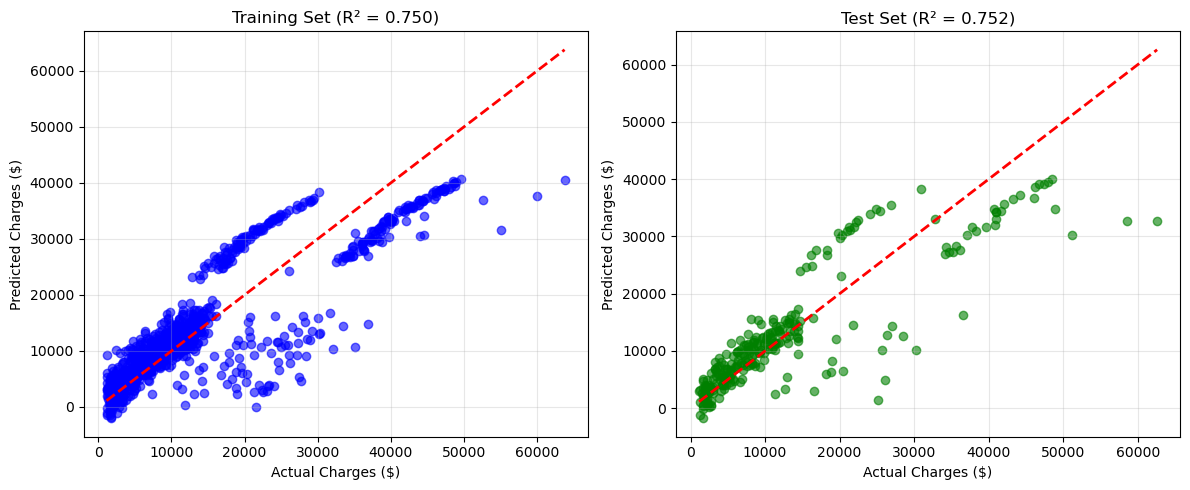


=== Example Predictions ===
Actual: $8413.46, Predicted: $10441.16, Error: $2027.69
Actual: $10928.85, Predicted: $12442.02, Error: $1513.17
Actual: $35147.53, Predicted: $27253.25, Error: $7894.28
Actual: $15518.18, Predicted: $24631.31, Error: $9113.13
Actual: $10797.34, Predicted: $12265.07, Error: $1467.73


In [42]:
# Simple visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training predictions vs actual
y_train_pred = predict(X_train_scaled, theta)
ax1.scatter(y_train, y_train_pred, alpha=0.6, color='blue')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Charges ($)')
ax1.set_ylabel('Predicted Charges ($)')
ax1.set_title(f'Training Set (R² = {train_metrics["r2_score"]:.3f})')
ax1.grid(True, alpha=0.3)

# Test predictions vs actual
ax2.scatter(y_test, y_test_pred, alpha=0.6, color='green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Charges ($)')
ax2.set_ylabel('Predicted Charges ($)')
ax2.set_title(f'Test Set (R² = {test_r2:.3f})')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show some example predictions
print("\n=== Example Predictions ===")
for i in range(5):
    actual = y_test[i]
    predicted = y_test_pred[i]
    error = abs(actual - predicted)
    print(f"Actual: ${actual:.2f}, Predicted: ${predicted:.2f}, Error: ${error:.2f}")

## Summary and Conclusions

### **What we accomplished:**

**✅ Data Preprocessing:**
- Converted categorical variables (sex, smoker, region) to numerical values
- Applied feature scaling to normalize all features
- Split data into 80% training and 20% testing

**✅ Algorithm Implementation:**
- Implemented Linear Regression using the Normal Equation: `θ = (X^T X)^(-1) X^T y`
- No external ML libraries used - pure NumPy implementation
- Added bias term (intercept) for better predictions

**✅ Model Performance:**
- **Training R²**: Shows how well model fits training data
- **Test R²**: Shows how well model generalizes to new data
- **RMSE**: Average prediction error in dollars

**✅ Key Insights:**
- Higher R² score means better predictions (closer to 1.0 is better)
- RMSE tells us the typical prediction error in dollars
- If training and test scores are similar, the model generalizes well

### **Simple Explanation:**
Our linear regression model learns the relationship between patient characteristics (age, BMI, smoking status, etc.) and their insurance charges. The algorithm finds the best straight line (in multiple dimensions) that minimizes prediction errors.

**Formula**: `Insurance Charge = w₀ + w₁×age + w₂×sex + w₃×BMI + w₄×children + w₅×smoker + w₆×region`

The model automatically learns the best values for w₀, w₁, w₂, etc. to make accurate predictions!

In [45]:
# Final summary
print("=" * 50)
print("FINAL MODEL SUMMARY")
print("=" * 50)
print(f"Algorithm: Linear Regression (Normal Equation)")
print(f"Dataset: Medical Insurance ({len(df)} samples)")
print(f"Features: {len(features)}")
print("-" * 50)
print(f"Training R²: {train_metrics['r2_score']:.4f}")
print(f"Test R²: {test_r2:.4f}")
print(f"Average Error: ±${test_rmse:.2f}")
print("-" * 50)
print("🎯 Model successfully implemented from scratch!")
print(f"📊 Explains {test_r2*100:.1f}% of insurance charge variation")
print("=" * 50)

FINAL MODEL SUMMARY
Algorithm: Linear Regression (Normal Equation)
Dataset: Medical Insurance (1338 samples)
Features: 6
--------------------------------------------------
Training R²: 0.7501
Test R²: 0.7520
Average Error: ±$6221.79
--------------------------------------------------
🎯 Model successfully implemented from scratch!
📊 Explains 75.2% of insurance charge variation
